# Hybrid Machine Learning using Ensemble Stacking Algorithm for Type II/ Gestational Diabetes Mellitus Detection

In [10]:
#Set Working Directory for saving files
import os
print(os.getcwd()) #Current working directory
os.chdir("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook") #Set working directory
print(os.getcwd()) #Check new working directory

C:\Users\aldwi
C:\Users\aldwi\OneDrive\Desktop\thesis\notebook


# Data Collection and Integration
In this section, the Pima Indian Diabetes Data (PIDD) and the Frankfurt Germany Diabetes Data (FGDD) will be imported, then merged. Both datasetes were acquired at Kaggle Data Repository, and licensed under the Creative Commons CC0 1.0 Universal Public Domain.

In [177]:
#Import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Set theme for visualizations
plt.style.use("seaborn-white")
sns.set_style("white")

#Importing the datasets
PIDD = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\1boomer\\data\\Original\\PIDD_NaN.csv")
FGDD = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\1boomer\\data\\Original\\FGDD_NaN.csv")

#Check the shapes of the datasets
print("PIDD:   ",PIDD.shape)
print("FGDD:   ", FGDD.shape)

#Merging the datasets
data = pd.concat([PIDD,FGDD])
print("Merged: ",data.shape)
data.to_csv("00PIDD_FGDD.csv")

PIDD:    (768, 9)
FGDD:    (2000, 9)
Merged:  (2768, 9)


In [3]:
data.head() #Overview of the data

,Pregnancies,Glucose,BloodPressure,SkinThick,Insulin,BMI,Pedigree,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [4]:
data.info() #Check some information about the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2768 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    2768 non-null   int64  
 1   Glucose        2750 non-null   float64
 2   BloodPressure  2643 non-null   float64
 3   SkinThick      1968 non-null   float64
 4   Insulin        1438 non-null   float64
 5   BMI            2729 non-null   float64
 6   Pedigree       2768 non-null   float64
 7   Age            2768 non-null   int64  
 8   Outcome        2768 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 216.2 KB


In [5]:
data.shape

(2768, 9)

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThick', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.describe().T

<br><br><br><br><br>
# Feature Engineering

The data preprocessing workflow in this study will be:
- Missing Value Imputation
- Outlier Detection
- Feature Scaling
- Data Augmentation
- Dimensionality Reduction

## Missing Value Imputation

In [8]:
data.isna().sum()

Pregnancies         0
Glucose            18
BloodPressure     125
SkinThick         800
Insulin          1330
BMI                39
Pedigree            0
Age                 0
Outcome             0
dtype: int64

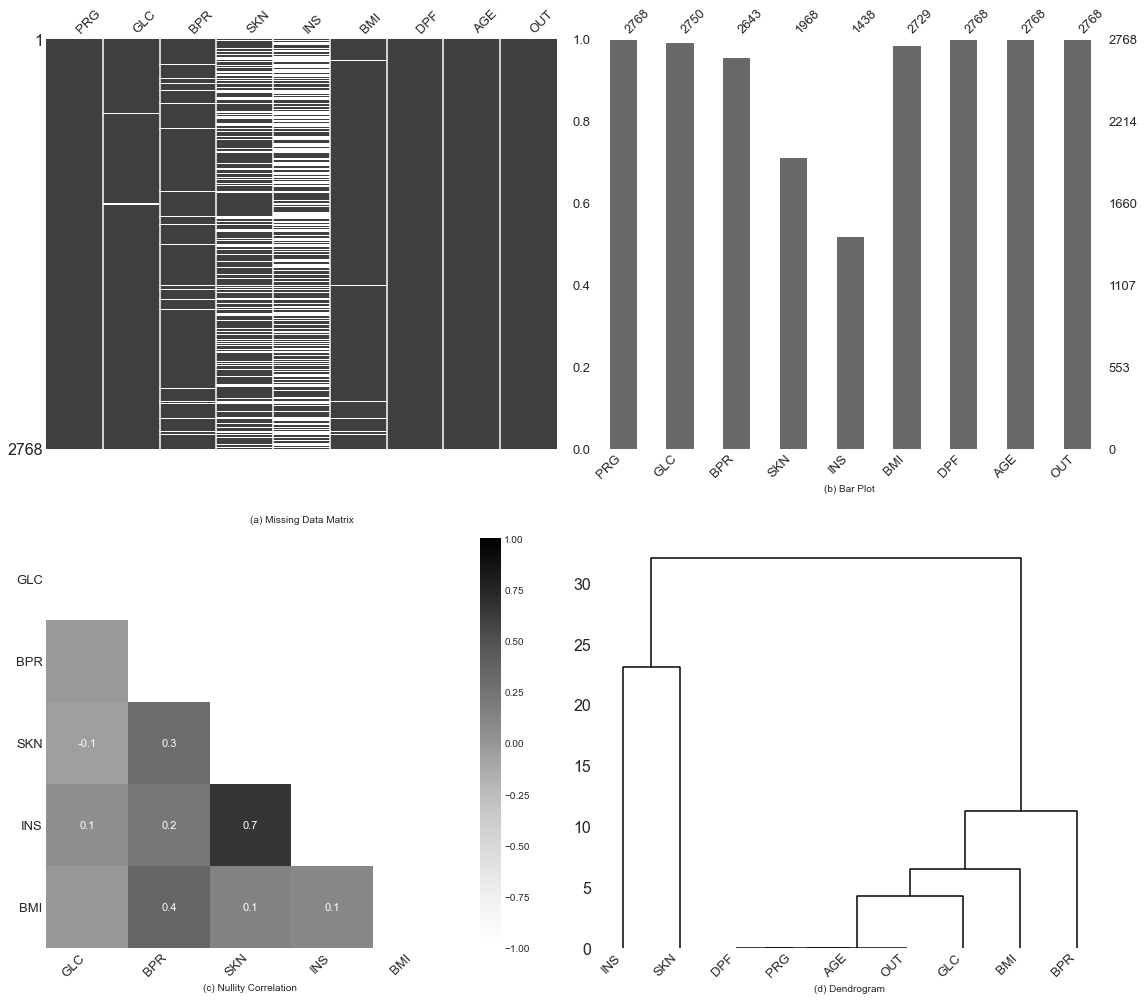

In [182]:
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\0PIDD_FGDD.csv")
sns.set_style("white")
def missingno(data):
    
    import missingno as msno
    fig,axes=plt.subplots(2,2,figsize=(16,14))
       
    g = msno.matrix(data,sparkline=False,labels=None,fontsize=13,ax=axes[0][0])
    g.set(xlabel="\n\n\n\n\n\n(a) Missing Data Matrix")
    
    g = msno.bar(data,fontsize=13,labels=None,ax=axes[0][1])
    g.set(xlabel="(b) Bar Plot")
    
    g = msno.heatmap(data,cmap='Greys',fontsize=13,ax=axes[1][0])
    g.set(xlabel="(c) Nullity Correlation")
    
    g = msno.dendrogram(data,fontsize=13,orientation="top",ax=axes[1][1])
    g.set(xlabel="(d) Dendrogram")
    
    plt.tight_layout()
    plt.savefig("MISSINGNO_matrix_bar_correlation_dendrogram.png")
    
missingno(data)

### Iterative Imputer Variants - Bayesian Ridge Regression, Random Forest Regressor, and K-Neighbors Regressor

#### Bayesian Ridge Regression

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

brr = IterativeImputer(estimator=BayesianRidge(),random_state=0)
brr = brr.fit_transform(data)

brr = pd.DataFrame(brr)
#brr.to_csv('data/BRR.csv')

#### Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

rfr = IterativeImputer(estimator=RandomForestRegressor(),random_state=0)
rfr = rfr.fit_transform(data)

rfr = pd.DataFrame(rfr)
rfr.to_csv('data/1RFR.csv')

#### Extra Trees Regressor

In [38]:
from sklearn.ensemble import ExtraTreesRegressor

etr = IterativeImputer(estimator=ExtraTreesRegressor(),random_state=0)
etr = etr.fit_transform(data)

etr = pd.DataFrame(etr)
etr.to_csv('data/1ETR.csv')

#### K-Neighbors Regressor

In [39]:
from sklearn.neighbors import KNeighborsRegressor

knr = IterativeImputer(estimator=KNeighborsRegressor(),random_state=0)
knr = knr.fit_transform(data)

knr = pd.DataFrame(knr)
knr.to_csv('data/1KNR.csv')

#### Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor

dtr = IterativeImputer(estimator=DecisionTreeRegressor(),random_state=0)
dtr = dtr.fit_transform(data)

dtr = pd.DataFrame(dtr)
dtr.to_csv('data/1DTR.csv')

In [139]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score, precision_score, f1_score, recall_score

brr = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\1BRR.csv")
rfr = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\1RFR.csv")
etr = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\1ETR.csv")
knr = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\1KNR.csv")
dtr = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\1DTR.csv")

X_brr = brr.drop(["Outcome"],axis=1)
y_brr = brr["Outcome"]

X_rfr = rfr.drop(["Outcome"],axis=1)
y_rfr = rfr["Outcome"]

X_etr = etr.drop(["Outcome"],axis=1)
y_etr = etr["Outcome"]

X_knr = knr.drop(["Outcome"],axis=1)
y_knr = knr["Outcome"]

X_dtr = dtr.drop(["Outcome"],axis=1)
y_dtr = dtr["Outcome"]

X_train_brr, X_test_brr, y_train_brr, y_test_brr = train_test_split(X_brr, y_brr, test_size=0.3, random_state=42)
X_train_rfr, X_test_rfr, y_train_rfr, y_test_rfr = train_test_split(X_rfr, y_rfr, test_size=0.3, random_state=42)
X_train_etr, X_test_etr, y_train_etr, y_test_etr = train_test_split(X_etr, y_etr, test_size=0.3, random_state=42)
X_train_knr, X_test_knr, y_train_knr, y_test_knr = train_test_split(X_knr, y_knr, test_size=0.3, random_state=42)
X_train_dtr, X_test_dtr, y_train_dtr, y_test_dtr = train_test_split(X_dtr, y_dtr, test_size=0.3, random_state=42)

rf = RandomForestClassifier()

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#X = [X_brr,X_rfr,X_etr,X_knr,X_dtr]
#y = [y_brr,y_rfr,y_etr,y_knr,y_dtr]

training = [(X_train_brr,y_train_brr),(X_train_rfr,y_train_rfr),(X_train_etr,y_train_etr),(X_train_knr,y_train_knr),(X_train_dtr,y_train_dtr)]
test = [(X_test_brr,y_test_brr),(X_test_rfr,y_test_rfr),(X_test_etr,y_test_etr),(X_test_knr,y_test_knr),(X_test_dtr,y_test_dtr)]

model = ["BRR", "RFR", "ETR", "KNR", "DTR"]
accuracy = []
precision = []
recall = []
F1 = []
AUC = []

count = 0
for i,j in training:
    forest = rf.fit(i,j)
    predict = forest.predict(test[count][0])
    
    acc = accuracy_score(test[count][1],predict)
    pre = precision_score(test[count][1],predict)
    rec = recall_score(test[count][1],predict)
    fscore = f1_score(test[count][1],predict)
    aucroc = roc_auc_score(test[count][1],predict)
    
    print(model[count])
    print(acc)
    print(pre)
    print(rec)
    print(fscore)
    print(aucroc)
    print("\n")
    
    accuracy.append(acc*100)
    precision.append(pre*100)
    recall.append(rec*100)
    F1.append(fscore*100)
    AUC.append(aucroc*100)
    
    count = count + 1

BRR
0.9771359807460891
0.9562043795620438
0.9739776951672863
0.9650092081031307
0.9763126910000132


RFR
0.9663056558363418
0.951310861423221
0.9442379182156134
0.9477611940298508
0.9605531228088744


ETR
0.9771359807460891
0.9595588235294118
0.9702602230483272
0.9648798521256932
0.9753436346558361


KNR
0.9699157641395909
0.9452554744525548
0.9628252788104089
0.9539594843462248
0.9680674436756672


DTR
0.9687123947051745
0.945054945054945
0.9591078066914498
0.9520295202952029
0.9662087076161876




In [141]:
import numpy as np

mvi = [model,accuracy,precision,recall,F1,AUC]
mvi = pd.DataFrame(mvi)
mvi.to_csv("MVI_IterativeImputerVariants_Comparison.csv")
mvi

,0,1,2,3,4
0,BRR,RFR,ETR,KNR,DTR
1,97.713598,96.630566,97.713598,96.991576,96.871239
2,95.620438,95.131086,95.955882,94.525547,94.505495
3,97.39777,94.423792,97.026022,96.282528,95.910781
4,96.500921,94.776119,96.487985,95.395948,95.202952
5,97.631269,96.055312,97.534363,96.806744,96.620871


In [142]:
mvi = pd.read_csv("C:/Users/aldwi/OneDrive/Desktop/thesis/notebook/MVI_IterativeImputerVariants_Comparison.csv")
mvi

,Model,Metrics,Score
0,BRR,Accuracy,97.713598
1,RFR,Accuracy,96.630566
2,ETR,Accuracy,97.713598
3,KNR,Accuracy,96.991576
4,DTR,Accuracy,96.871239
5,BRR,Precision,95.620438
6,RFR,Precision,95.131086
7,ETR,Precision,95.955882
8,KNR,Precision,94.525547
9,DTR,Precision,94.505495


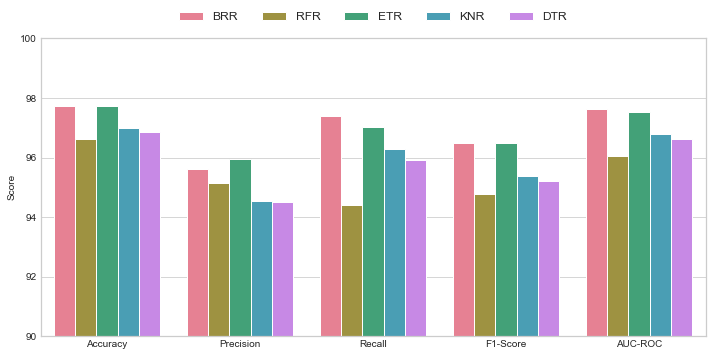

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")

sns.barplot(data=mvi,x="Metrics",y="Score",hue="Model",palette="husl")

plt.xlabel(None)
plt.ylim(90,100)
plt.legend(loc=9, fontsize="large", ncol=5, bbox_to_anchor=(0.5,1.125))
#plt. legend(["Bayesian Ridge Regression", "Random Forest Regressor","Extra Tree Regressor", "K-Neighbors Regressor","Decision Tree Regressor"], loc='lower right', fontsize='medium')
plt.tight_layout()
plt.savefig("MVI_Comparison.png")

In [46]:
%%time
from sklearn.linear_model import BayesianRidge
brr = IterativeImputer(estimator=BayesianRidge(),random_state=0)
brr = brr.fit_transform(data)

CPU times: total: 297 ms
Wall time: 81.6 ms


In [54]:
%%time
from sklearn.ensemble import RandomForestRegressor
rfr = IterativeImputer(estimator=RandomForestRegressor(),random_state=0)
rfr = rfr.fit_transform(data)

CPU times: total: 50.2 s
Wall time: 50.7 s


In [55]:
%%time
from sklearn.ensemble import ExtraTreesRegressor
etr = IterativeImputer(estimator=ExtraTreesRegressor(),random_state=0)
etr = etr.fit_transform(data)

CPU times: total: 25.6 s
Wall time: 26 s


In [49]:
%%time
from sklearn.neighbors import KNeighborsRegressor
knr = IterativeImputer(estimator=KNeighborsRegressor(),random_state=0)
knr = knr.fit_transform(data)

CPU times: total: 359 ms
Wall time: 373 ms


In [50]:
%%time
from sklearn.tree import DecisionTreeRegressor
dtr = IterativeImputer(estimator=DecisionTreeRegressor(),random_state=0)
dtr = dtr.fit_transform(data)

CPU times: total: 547 ms
Wall time: 562 ms


## Outlier Detection

In [101]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThick', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

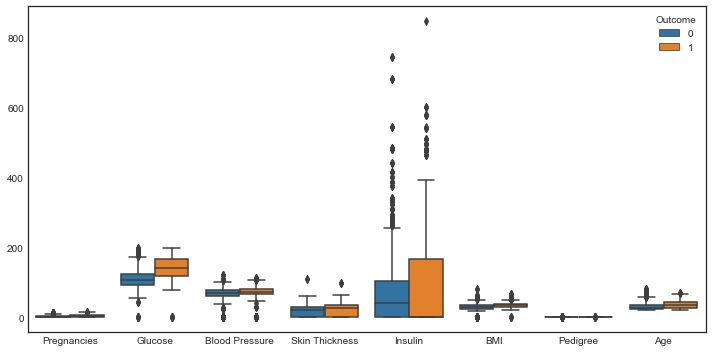

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\0PIDD_FGDD.csv")
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\0PIDD_FGDD - Copy.csv")

plt.style.use("seaborn-white")
sns.set_style("white")

plt.figure(figsize=(10,5))
sns.boxplot(data=data, x="Feature",y="Value",hue="Outcome")
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.savefig("boxplot_before_outlierdetection_hue.png")

In [131]:
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\1BRR.csv")

for i in data.columns:
    q3 = data[i].quantile(0.75)
    q1 = data[i].quantile(0.25)
    IQR = q3 - q1
    
    upper = q3 + (1.5*IQR)
    lower = q1 - (1.5*IQR)
    
    data.loc[~data[i].between((q1-1.5*IQR), (q3+1.5*IQR), inclusive=False),i] = np.nan

C:\Users\aldwi\AppData\Local\Temp\ipykernel_11940\3117215137.py:11: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data.loc[~data[i].between((q1-1.5*IQR), (q3+1.5*IQR), inclusive=False),i] = np.nan


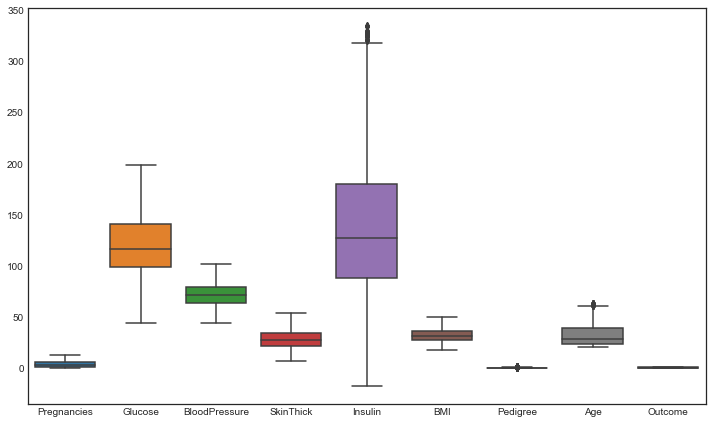

In [132]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.tight_layout()
plt.savefig("boxplot_after_outlierdetection.png")

##### ExtraTreesRegressor Data

In [80]:
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\1ETR.csv")
data = data.drop(['Unnamed: 0'],axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThick,Insulin,BMI,Pedigree,Age,Outcome
0,6,148.0,72.0,35.00,226.66,33.6,0.627,50,1
1,1,85.0,66.0,29.00,58.46,26.6,0.351,31,0
2,8,183.0,64.0,24.01,265.52,23.3,0.672,32,1
3,1,89.0,66.0,23.00,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35.00,168.00,43.1,2.288,33,1


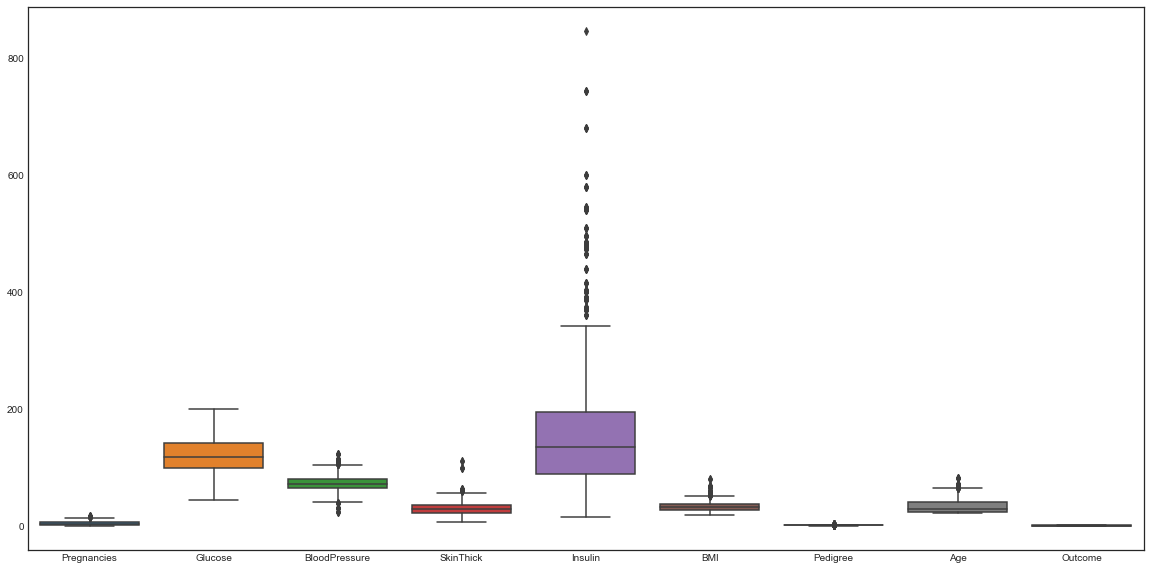

In [81]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)
plt.savefig("etr_boxplot_before_outlierdetection.png")

In [82]:
for i in data.columns:
    q3 = data[i].quantile(0.75)
    q1 = data[i].quantile(0.25)
    IQR = q3 - q1
    
    upper = q3 + (1.5*IQR)
    lower = q1 - (1.5*IQR)
    
    data.loc[~data[i].between((q1-1.5*IQR), (q3+1.5*IQR), inclusive=False),i] = np.nan

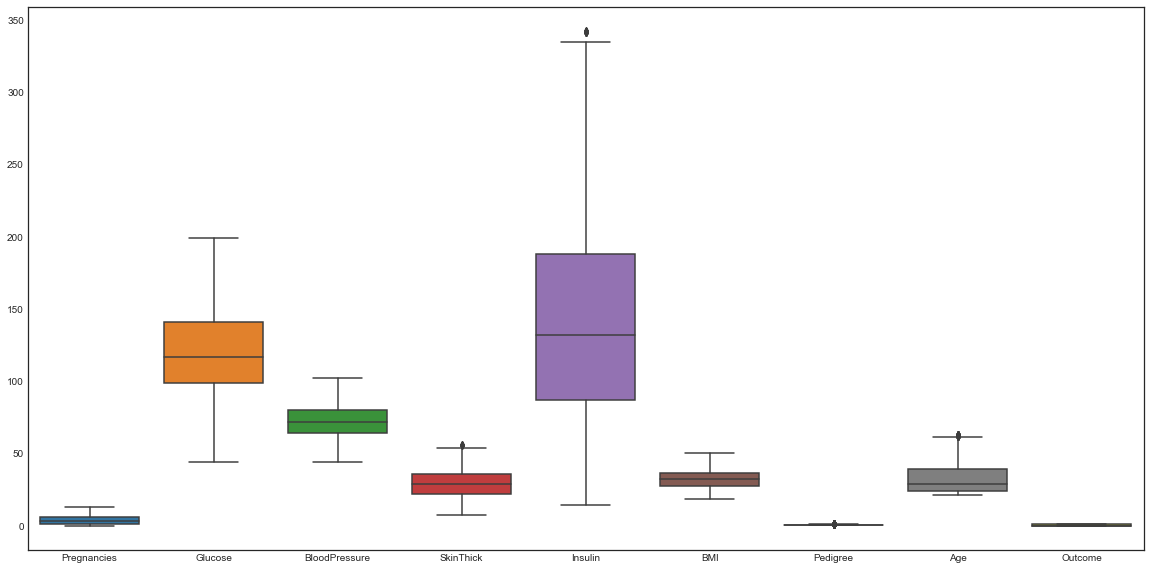

In [83]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)
plt.savefig("etr_boxplot_after_outlierdetection.png")

In [84]:
etr = IterativeImputer(estimator=ExtraTreesRegressor(),random_state=0)
etr = etr.fit_transform(data)
etr = pd.DataFrame(etr)
etr.to_csv('data/2IQR_ETR.csv',index=False)

## Feature Scaling

In [122]:
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\2IQR_ETR.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    2768 non-null   float64
 1   Glucose        2768 non-null   float64
 2   BloodPressure  2768 non-null   float64
 3   SkinThick      2768 non-null   float64
 4   Insulin        2768 non-null   float64
 5   BMI            2768 non-null   float64
 6   Pedigree       2768 non-null   float64
 7   Age            2768 non-null   float64
 8   Outcome        2768 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 194.8 KB


In [124]:
from sklearn.preprocessing import StandardScaler
ss_iqr_etr = StandardScaler().fit_transform(data)
ss_iqr_etr = pd.DataFrame(ss_iqr_etr)
ss_iqr_etr.to_csv('3SS_IQR_ETR.csv',index=False)

## Data Augmentation and Principal Component Analysis

In [133]:
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\2IQR_ETR.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    2768 non-null   float64
 1   Glucose        2768 non-null   float64
 2   BloodPressure  2768 non-null   float64
 3   SkinThick      2768 non-null   float64
 4   Insulin        2768 non-null   float64
 5   BMI            2768 non-null   float64
 6   Pedigree       2768 non-null   float64
 7   Age            2768 non-null   float64
 8   Outcome        2768 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 194.8 KB


In [134]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThick,Insulin,BMI,Pedigree,Age,Outcome
0,6.0,148.0,72.0000,35.00,226.66,33.6,0.62700,50.0,1
1,1.0,85.0,66.0000,29.00,58.46,26.6,0.35100,31.0,0
2,8.0,183.0,64.0000,24.01,265.52,23.3,0.67200,32.0,1
3,1.0,89.0,66.0000,23.00,94.00,28.1,0.16700,21.0,0
4,0.0,137.0,75.9412,35.00,168.00,43.1,0.44856,33.0,1


In [135]:
X=data.drop(["Outcome"],axis=1)
y=data["Outcome"]

In [136]:
from collections import Counter
from imblearn.over_sampling import SMOTE 

print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 1816, 1: 952})
Resampled dataset shape Counter({1: 1816, 0: 1816})


In [139]:
smote_iqr_etr = pd.concat([X_res, y_res],axis=1)
smote_iqr_etr.to_csv("SMOTE_IQR_ETR.csv",index=False)

In [140]:
smote_iqr_etr.shape

(3632, 9)

NameError: name 'X' is not defined

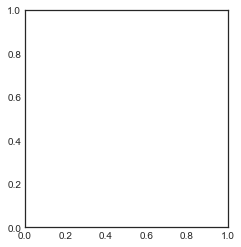

In [17]:
fig = plt.figure(figsize=(8,4))

imbalance = [1816,952]
balance = [1816,1816]
classes = ['Diabetic','Non-diabetic']

ax = fig.add_subplot(121)
ax.pie(imbalance, labels=classes, autopct='%.1f%%',startangle=90,explode=len(X_res))
ax.set_title("Before SMOTE",fontweight="bold",size=13)
ax.set_xlabel("Total = 2768; Diabetic = 1816; Non-diabetic = 952")

ax = fig.add_subplot(122)
ax.pie(balance, labels=classes, autopct='%.1f%%',startangle=90)
ax.set_title("After SMOTE",fontweight="bold",size=13)
ax.set_xlabel("Total = 3632; Diabetic = 1816; Non-diabetic = 1816")
plt.tight_layout()
plt.savefig("smote.png")

## Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

X = smote_iqr_etr.drop(["Outcome"],axis=1)
y = smote_iqr_etr["Outcome"]

pca = PCA()
pca.fit(X)

<br><br><br><br><br>
# Exploratory Data Analysis

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title= "Pandas Profiling Report", explorative=True)
profile.to_file("ProfileReport.html")
profile.to_widgets()

<br><br><br><br><br>
## PyCaret

https://colab.research.google.com/drive/1_H0sHYhzKGZDmgzrQLosuZAR3nOaL6CN?usp=sharing#scrollTo=NEcL4-LfdEyv

In [ ]:
import pycaret
from pycaret.classification import *

data = pd.read_csv('/contents/diabetes.csv')

class = setup(data = DataFrame_name, target = 'target_variable_name')

compare_models()

create_models('Model_ID')

tuned = tune_model(dt, n_iter = 50)

plot_model(tuned)

interpret_model(tuned)

predict_model(tuned)

finalize_model(model)

save_model(tuned)

### Setup

In [54]:
from pycaret.classification import *
s = setup(data, target = 'Outcome',fold_shuffle=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(3421, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

### Compare Models

In [87]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9896,0.9995,0.9960,0.9844,0.9901,0.9790,0.9792,0.0520
rf,Random Forest Classifier,0.9883,0.9989,0.9936,0.9845,0.9889,0.9765,0.9768,0.0620
xgboost,Extreme Gradient Boosting,0.9862,0.9969,0.9920,0.9820,0.9869,0.9724,0.9726,0.0680
lightgbm,Light Gradient Boosting Machine,0.9854,0.9974,0.9920,0.9806,0.9862,0.9707,0.9710,0.2010
catboost,CatBoost Classifier,0.9808,0.9960,0.9872,0.9767,0.9818,0.9615,0.9618,1.5160
dt,Decision Tree Classifier,0.9795,0.9796,0.9768,0.9841,0.9804,0.9590,0.9592,0.0100
knn,K Neighbors Classifier,0.9319,0.9861,0.9824,0.8977,0.9379,0.8630,0.8679,0.2900
gbc,Gradient Boosting Classifier,0.9031,0.9686,0.9287,0.8907,0.9092,0.8054,0.8066,0.0490
ada,Ada Boost Classifier,0.8317,0.9177,0.8519,0.8320,0.8410,0.6622,0.6639,0.0250
lr,Logistic Regression,0.7966,0.8738,0.7902,0.8153,0.8019,0.5930,0.5943,1.0970


### Plot Model

In [ ]:
plot_model(best)

### Create Model

In [90]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.9917
1,0.9792,0.9986,0.9920,0.9688,0.9802,0.9582,0.9585
2,0.9958,0.9993,1.0000,0.9921,0.9960,0.9916,0.9917
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9874,0.9999,0.9920,0.9841,0.9880,0.9748,0.9749
7,0.9874,1.0000,1.0000,0.9766,0.9881,0.9748,0.9751
8,0.9749,0.9987,1.0000,0.9542,0.9766,0.9496,0.9508
9,0.9749,0.9983,0.9840,0.9685,0.9762,0.9496,0.9498


### Fine-tuning

In [91]:
tuned = tune_model(et, n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9583,0.9914,0.9760,0.9457,0.9606,0.9164,0.9169
1,0.9042,0.9762,0.9280,0.8923,0.9098,0.8077,0.8084
2,0.9500,0.9885,0.9360,0.9669,0.9512,0.9000,0.9005
3,0.9667,0.9939,0.9840,0.9535,0.9685,0.9331,0.9336
4,0.9791,0.9987,0.9758,0.9837,0.9798,0.9581,0.9581
5,0.9623,0.9954,0.9520,0.9754,0.9636,0.9246,0.9249
6,0.9707,0.9912,0.9840,0.9609,0.9723,0.9412,0.9415
7,0.9707,0.9978,0.9920,0.9538,0.9725,0.9412,0.9420
8,0.9163,0.9816,0.9520,0.8947,0.9225,0.8318,0.8337
9,0.9540,0.9885,0.9760,0.9385,0.9569,0.9076,0.9084


In [ ]:
plot_model(et)

### Interpret Model

In [ ]:
model = create_model('Model_name')

In [95]:
interpret_model(tuned)

ImportError: shap library not found. pip install shap to use interpret_model function.

In [97]:
predict_model(tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9611,0.9933,0.9794,0.9474,0.9631,0.9219,0.9225


,Pregnancies,Glucose,BloodPressure,SkinThick,Insulin,BMI,Pedigree,Age,Outcome,Label,Score
0,8.000000,91.000000,82.000000,32.710533,100.587372,35.599998,0.587000,39.440483,0,0,0.8683
1,1.000000,111.000000,62.000000,13.000000,182.000000,24.000000,0.138000,23.000000,0,0,0.9858
2,1.521704,146.666397,72.057877,38.956593,247.463821,36.872589,0.611516,26.028938,1,1,0.6754
3,2.000000,174.000000,88.000000,37.000000,120.000000,44.500000,0.646000,24.000000,1,1,0.9794
4,1.000000,151.000000,60.000000,21.847322,156.512985,26.100000,0.179000,22.000000,0,0,0.9428
...,...,...,...,...,...,...,...,...,...,...,...
1022,1.883124,184.233749,76.978333,22.436800,195.805649,31.058437,0.470462,26.393957,1,1,0.9123
1023,1.000000,196.000000,76.000000,36.000000,249.000000,36.500000,0.875000,29.000000,1,1,0.9925
1024,8.000000,179.000000,72.000000,42.000000,130.000000,32.700001,0.719000,36.000000,1,1,0.9564
1025,1.000000,124.000000,60.000000,32.000000,144.907913,35.799999,0.514000,21.000000,0,0,0.6933


### Finalize Model

In [ ]:
model = create_model('Model_name')
finalize_model(model)

### Save Model

In [ ]:
save_model(tuned)

### Classification Experiment

In [ ]:
from pycaret.classification import ClassificationExperiment
exp1 = ClassificationExperiment()

exp1.setup(data, target = '')

dir(exp1)

exp1.compare_models()

### Evaluation Metrics

In [98]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<br><br><br><br><br>
# Ensemble Learning 

## Stacking

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

X = 
y = 

from mlens.ensemble import SuperLearner
ensemble = SuperLearner(scorer=accuracy_score, random_state=42)

#Base learner(s)
ensemble.add([RandomForestClassifier(random_state=seed), 
              SVC(random_state=seed)])

#Meta-learner
ensemble.add_meta(LogisticRegression())

ensemble.fit(X_train, y_train)
preds = ensemble.predict(X_test)

#Check Performance
print("Fit data:\n%r" % ensemble.data)

<br><br><br><br><br>

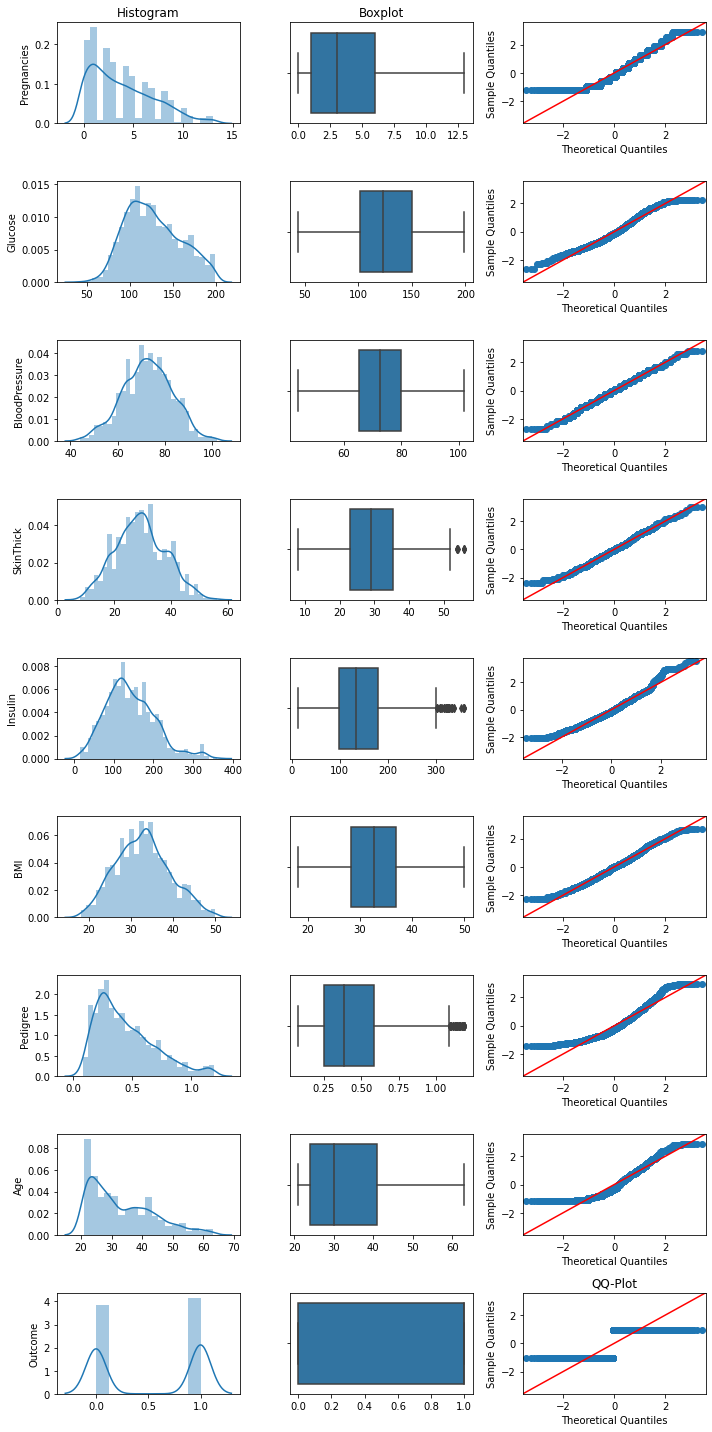

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

fig,axes = plt.subplots(9,3, figsize=(10,20))

j=0
for i in data.columns:
    g = sns.distplot(data[i],ax = axes[j][0])
    g.set(xlabel=None)
    g.set(ylabel=i)
    if j == 0:
        g.set(title="Histogram")
    j+=1

j=0
for i in data.columns:
    g = sns.boxplot(data[i],ax = axes[j][1])
    g.set(xlabel=None)
    g.set(ylabel=None)
    if j == 0:
        g.set(title="Boxplot")
    j+=1

import scipy.stats as stats
j=0
for i in data.columns:
    sm.qqplot(data[i],line ='45', fit=True,ax = axes[j][2])
    if j == 0:
        plt.title("QQ-Plot")
    j+=1
    
plt.tight_layout()
plt.savefig("eda.jpg")

In [182]:
from ptitprince import RainCloud
help(RainCloud)

Help on function RainCloud in module ptitprince.PtitPrince:

RainCloud(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient='v', width_viol=0.7, width_box=0.15, palette='Set2', bw=0.2, linewidth=1, cut=0.0, scale='area', jitter=1, move=0.0, offset=None, point_size=3, ax=None, pointplot=False, alpha=None, dodge=False, linecolor='red', **kwargs)
    Draw a Raincloud plot of measure `y` of different categories `x`. Here `x` and `y` different columns of the pandas dataframe `data`.
    
    A raincloud is made of:
    
        1) "Cloud", kernel desity estimate, the half of a violinplot.
        2) "Rain", a stripplot below the cloud
        3) "Umberella", a boxplot
        4) "Thunder", a pointplot connecting the mean of the different categories (if `pointplot` is `True`)
    
    Main inputs:
        x           categorical data. Iterable, np.array, or dataframe column name if 'data' is specified
        y           measure data. Iterable, np.array, or dataframe colum

In [6]:
import pandas as pd
from pycaret.classification import *
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\SMOTE_IQR_ETR.csv")
setup(data=data,target="Outcome",fold_shuffle=True)
print(models())

,Description,Value
0,session_id,1024
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(3632, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [2]:
from pycaret.classification import *

'''
setup(data = data,
     target = "Outcome",
     preprocess = False,
     numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThick', 'Insulin','BMI', 'Pedigree', 'Age'],
     fold_strategy = 'stratifiedkfold')
'''
help(setup)

Help on function setup in module pycaret.classification:

setup(data: pandas.core.frame.DataFrame, target: str, train_size: float = 0.7, test_data: Optional[pandas.core.frame.DataFrame] = None, preprocess: bool = True, imputation_type: str = 'simple', iterative_imputation_iters: int = 5, categorical_features: Optional[List[str]] = None, categorical_imputation: str = 'constant', categorical_iterative_imputer: Union[str, Any] = 'lightgbm', ordinal_features: Optional[Dict[str, list]] = None, high_cardinality_features: Optional[List[str]] = None, high_cardinality_method: str = 'frequency', numeric_features: Optional[List[str]] = None, numeric_imputation: str = 'mean', numeric_iterative_imputer: Union[str, Any] = 'lightgbm', date_features: Optional[List[str]] = None, ignore_features: Optional[List[str]] = None, normalize: bool = False, normalize_method: str = 'zscore', transformation: bool = False, transformation_method: str = 'yeo-johnson', handle_unknown_categorical: bool = True, unknown_

In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThick', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [11]:
setup = setup(data=data,                        # Dataset
             target="Outcome",                  # Target Variable
             train_size=0.7,                    # Data Splitting
             fold_strategy='stratifiedkfold',   # Stratified k-fold Cross-Validation 
             fold_shuffle=True,                 # Shuffle the data splitting
             preprocess=False)                  # Off the automatic data preprocessing

,Description,Value
0,session_id,6800
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2768, 9)"
5,Missing Values,True
6,Numeric Features,7
7,Categorical Features,1
8,Transformed Train Set,"(2214, 8)"
9,Transformed Test Set,"(554, 8)"


In [13]:
best = compare_models(return_train_score=True)

TypeError: compare_models() got an unexpected keyword argument 'return_train_score'

In [172]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThick', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

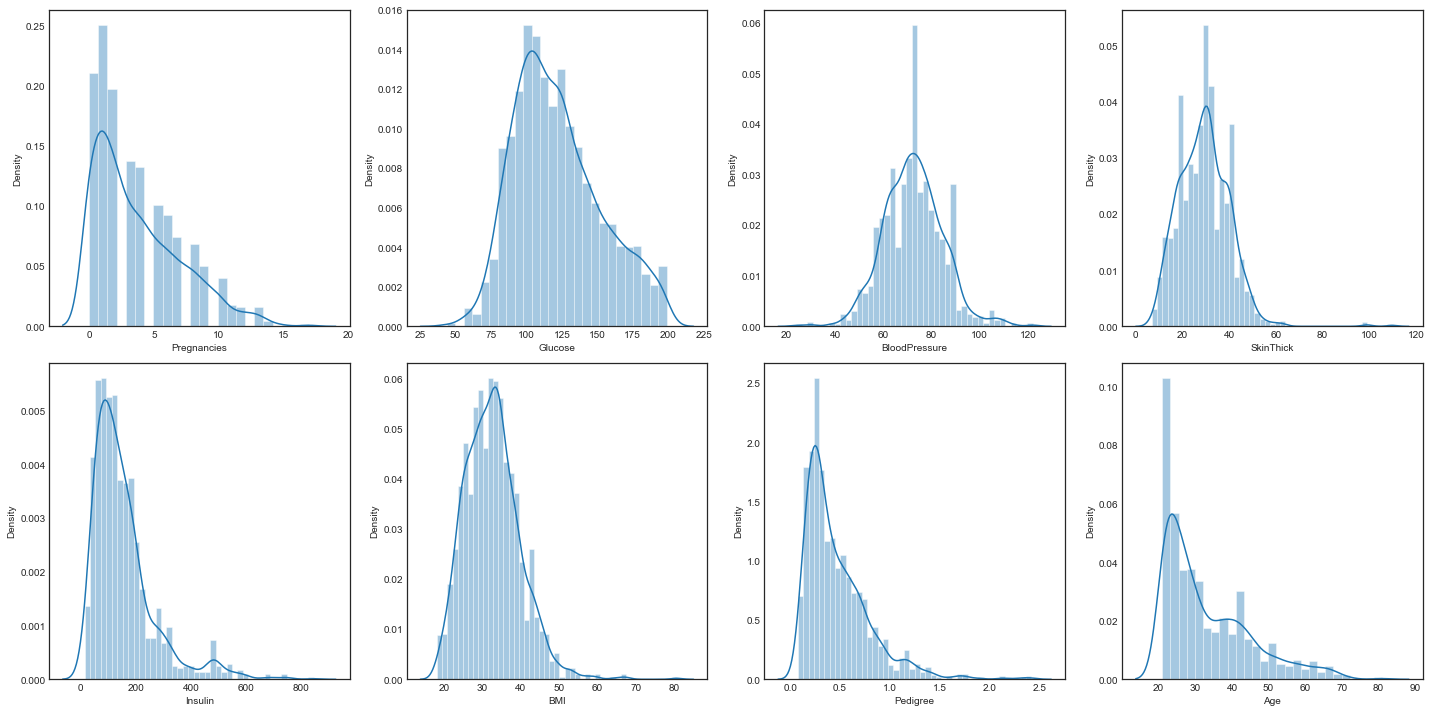

In [180]:
fig, axes = plt.subplots(2,4,figsize=(15,8))

j=0
k=0

data = data.drop(["Outcome"],axis=1)

for i in data.columns:
    sns.distplot(data[i],ax=axes[j][k])
    
    k+=1
    
    if (k==4):
        j=1
        k=0

plt.tight_layout()
plt.savefig("distplot.png")

# Distribution Analysis

In [1]:
pip install ptitprince

Note: you may need to restart the kernel to use updated packages.
